In [256]:
import pandas as pd 
import numpy as np 
import os
import env
import wrangle

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [257]:
# Used function from wrangle to acquire data 
cohort_df = wrangle.get_all_cohort_data()

cohort_df.head(3)

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,date,time,path,user_id,cohort_id,ip
0,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61
2,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61


In [258]:
cohort_df['date_time'] = cohort_df['date'] + ' ' + cohort_df['time']
cohort_df.head(2)

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,date,time,path,user_id,cohort_id,ip,date_time
0,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,2018-01-26 09:55:03
1,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,2018-01-26 09:56:02


In [259]:
# convert into DateTime values 
cohort_df.date_time = pd.to_datetime(cohort_df.date_time)
cohort_df.start_date = pd.to_datetime(cohort_df.start_date)
cohort_df.end_date = pd.to_datetime(cohort_df.end_date)
cohort_df.created_at = pd.to_datetime(cohort_df.created_at)
cohort_df.updated_at = pd.to_datetime(cohort_df.updated_at)

In [260]:
# Drop all the staff rows 
cohort_df = cohort_df[cohort_df.name != 'Staff']

In [261]:
cohort_df= cohort_df.set_index('date_time')
cohort_df.head(2)

,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id,date,time,path,user_id,cohort_id,ip
date_time,,,,,,,,,,,,,,,
2018-01-26 09:55:03,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1.0,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61


In [262]:
cohort_df = cohort_df.drop(columns=['deleted_at', 'id', 'date', 'time'])
cohort_df.head(2)

,name,slack,start_date,end_date,created_at,updated_at,program_id,path,user_id,cohort_id,ip
date_time,,,,,,,,,,,
2018-01-26 09:55:03,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,java-ii,1,8.0,97.105.19.61


In [263]:
cohort_df = cohort_df.fillna({'path': cohort_df['path'].mode()[0]})
cohort_df.head(2)

,name,slack,start_date,end_date,created_at,updated_at,program_id,path,user_id,cohort_id,ip
date_time,,,,,,,,,,,
2018-01-26 09:55:03,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0,java-ii,1,8.0,97.105.19.61


In [264]:
cohort_df['program_id'] = cohort_df.program_id.map({1.0: 'Full-Stack Web Development – PHP', 
                          2.0: 'Full-Stack Web Development – Java',
                          3.0: 'Data Science',
                          4.0: 'Front-End Web Development'})
cohort_df.head(2)

,name,slack,start_date,end_date,created_at,updated_at,program_id,path,user_id,cohort_id,ip
date_time,,,,,,,,,,,
2018-01-26 09:55:03,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Full-Stack Web Development – PHP,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Full-Stack Web Development – PHP,java-ii,1,8.0,97.105.19.61


In [265]:
cohort_df.cohort_id.value_counts()

cohort_id
33.0     40730
29.0     38096
62.0     37109
53.0     36902
24.0     35636
57.0     33844
56.0     33568
51.0     32888
59.0     32015
22.0     30926
58.0     29855
32.0     29356
23.0     28534
52.0     28033
26.0     27749
34.0     26538
25.0     25586
31.0     25359
132.0    23691
55.0     21582
27.0     20743
61.0     17713
134.0    16623
135.0    16397
133.0    14715
14.0      9587
1.0       8890
137.0     8562
21.0      7444
138.0     7276
17.0      4954
13.0      2845
18.0      2158
8.0       1712
139.0     1672
19.0      1237
16.0       755
15.0       691
7.0        598
12.0       302
11.0       253
2.0         93
6.0         72
9.0          5
4.0          4
5.0          1
Name: count, dtype: int64

In [266]:
# I keep gatting brackage when trying to covert this float into a string. 
# If I have time come back and fix this
'''
# Handle non-finite values (NaN) by filling them with a default value
cohort_df['cohort_id'] = cohort_df['cohort_id'].fillna(-1)

# Convert the cohort_id column from float to integer
cohort_df['cohort_id'] = cohort_df['cohort_id'].astype(int)

# Print the DataFrame with the converted cohort_id column
print(cohort_df)
'''
# Convert the cohort_id column from float to integer
# cohort_df['cohort_id'] = cohort_df['cohort_id'].astype(int)

"\n# Handle non-finite values (NaN) by filling them with a default value\ncohort_df['cohort_id'] = cohort_df['cohort_id'].fillna(-1)\n\n# Convert the cohort_id column from float to integer\ncohort_df['cohort_id'] = cohort_df['cohort_id'].astype(int)\n\n# Print the DataFrame with the converted cohort_id column\nprint(cohort_df)\n"

In [267]:
cohort_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 816192 entries, 2018-01-26 09:55:03 to 2021-04-21 16:41:51
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   name        763299 non-null  object        
 1   slack       763299 non-null  object        
 2   start_date  763299 non-null  datetime64[ns]
 3   end_date    763299 non-null  datetime64[ns]
 4   created_at  763299 non-null  datetime64[ns]
 5   updated_at  763299 non-null  datetime64[ns]
 6   program_id  763299 non-null  object        
 7   path        816192 non-null  object        
 8   user_id     816192 non-null  int64         
 9   cohort_id   763299 non-null  float64       
 10  ip          816192 non-null  object        
dtypes: datetime64[ns](4), float64(1), int64(1), object(5)
memory usage: 74.7+ MB


In [268]:
cohort_df_with_nulls = cohort_df.copy()
cohort_df.head(2)

,name,slack,start_date,end_date,created_at,updated_at,program_id,path,user_id,cohort_id,ip
date_time,,,,,,,,,,,
2018-01-26 09:55:03,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Full-Stack Web Development – PHP,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Full-Stack Web Development – PHP,java-ii,1,8.0,97.105.19.61


In [269]:
cohort_df = cohort_df.dropna()
cohort_df.isnull().sum()

name          0
slack         0
start_date    0
end_date      0
created_at    0
updated_at    0
program_id    0
path          0
user_id       0
cohort_id     0
ip            0
dtype: int64

In [270]:
cohort_df.sample(3)

,name,slack,start_date,end_date,created_at,updated_at,program_id,path,user_id,cohort_id,ip
date_time,,,,,,,,,,,
2019-09-04 09:33:11,Ceres,#ceres,2019-07-15,2019-12-11,2019-07-15 16:57:21,2019-07-15 16:57:21,Full-Stack Web Development – Java,jquery/effects,451,33.0,97.105.19.58
2020-12-06 22:22:18,Jupiter,#jupiter,2020-09-21,2021-03-30,2020-09-21 18:06:27,2020-09-21 18:06:27,Full-Stack Web Development – Java,java-i/syntax-types-and-variables,750,62.0,45.20.118.158
2021-04-14 11:18:33,Kalypso,#kalypso,2020-11-02,2021-05-04,2020-11-02 20:43:58,2020-11-02 20:43:58,Full-Stack Web Development – Java,search/search_index.json,801,132.0,67.11.243.229


In [271]:
file_endings = ('.json', 'map', 'api', 'site', '.jpg', '.jpeg', '.svg')

cohort_df = cohort_df[cohort_df.path.str.endswith(file_endings) == False]

## 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [272]:
# create function 
def top_paths(df: pd.DataFrame, program: str) -> None:
    temp_df = df[df.program_id == program]
    top = temp_df.path.value_counts()[:5]
    print(f'Top 5 Trafficed Paths -> {top}')
    


In [273]:
list_of_cohorts = [
    "Full-Stack Web Development – PHP",
    "Full-Stack Web Development – Java",
    "Data Science",
    "Front-End Web Development",
]
sep_line = "=" * 60

for cohort in list_of_cohorts:
    top_paths(cohort_df, cohort)
    print(sep_line)

Top 5 Trafficed Paths -> path
/               1681
index.html      1011
javascript-i     736
html-css         542
spring           501
Name: count, dtype: int64
Top 5 Trafficed Paths -> path
/               29474
toc             16517
javascript-i    15640
java-iii        11290
html-css        11285
Name: count, dtype: int64
Top 5 Trafficed Paths -> path
/                                           8359
classification/overview                     1785
1-fundamentals/1.1-intro-to-data-science    1633
sql/mysql-overview                          1424
fundamentals/intro-to-data-science          1413
Name: count, dtype: int64
Top 5 Trafficed Paths -> path
content/html-css                               2
/                                              1
content/html-css/gitbook/images/favicon.ico    1
content/html-css/introduction.html             1
Name: count, dtype: int64


In [274]:
# looking at the top trafficed lessons for Full-Stack Web Development - PHP
WD_PHP = cohort_df[cohort_df.program_id == 'Full-Stack Web Development – PHP']
top_PHP = WD_PHP.path.value_counts()[:5]

# looking at the top trafficed lessons for Full-Stack Web Development - Java
WD_Java = cohort_df[cohort_df.program_id == 'Full-Stack Web Development – Java']
top_Java = WD_Java.path.value_counts()[:5]

# looking at the top trafficed lessons for Data Science
Data_S = cohort_df[cohort_df.program_id == 'Data Science']
top_Data = Data_S.path.value_counts()[:5]

# looking at the top trafficed lessons for Front-End Web Development 
WD_Front = cohort_df[cohort_df.program_id == 'Front-End Web Development']
top_Front = WD_Front.path.value_counts()[:5]

# Creating a line to separte the results 
sep_line = '=' * 60

print(f'Top 5 Trafficed Lessons PHP -> {top_PHP}')
print(sep_line)
print(f'Top 5 Trafficed Lessons Java -> {top_Java}')
print(sep_line)
print(f'Top 5 Trafficed Lessons Data -> {top_Data}')
print(sep_line)
print(f'Top 5 Trafficed Lessons Front -> {top_Front}')

Top 5 Trafficed Lessons PHP -> path
/               1681
index.html      1011
javascript-i     736
html-css         542
spring           501
Name: count, dtype: int64
Top 5 Trafficed Lessons Java -> path
/               29474
toc             16517
javascript-i    15640
java-iii        11290
html-css        11285
Name: count, dtype: int64
Top 5 Trafficed Lessons Data -> path
/                                           8359
classification/overview                     1785
1-fundamentals/1.1-intro-to-data-science    1633
sql/mysql-overview                          1424
fundamentals/intro-to-data-science          1413
Name: count, dtype: int64
Top 5 Trafficed Lessons Front -> path
content/html-css                               2
/                                              1
content/html-css/gitbook/images/favicon.ico    1
content/html-css/introduction.html             1
Name: count, dtype: int64


##### Answer 
- Full-Stack Web Development - PHP = javascript-i 


- Full-Stack Web Development – Java = javascript-i 


- Data Science = classification/overview 
    

- Front-End Web Development = content/html-css  

## 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

In [275]:
# create function 
def top_paths_by_name(df: pd.DataFrame, program: str) -> None:
    df = df[['name', 'path']]
    by_name = df.groupby(df['name'], group_keys=True).apply(lambda x: x)
    temp_df = by_name[by_name.name == program]
    print(f'Top Paths by Cohort -> {temp_df.path.value_counts()[:10]}') 
    print(sep_line)


In [276]:
# Create Dataframe with only Data Science
Data_S = cohort_df[cohort_df.program_id == "Data Science"]

list_of_cohort_names = ["Darden", "Bayes", "Curie", "Easley", "Florence"]
sep_line = "=" * 60

for cohort in list_of_cohort_names:
    top_paths_by_name(Data_S, cohort)
    print(sep_line)

Top Paths by Cohort -> path
/                                           2980
classification/overview                     1109
sql/mysql-overview                           774
anomaly-detection/overview                   592
1-fundamentals/1.1-intro-to-data-science     460
classification/logistic-regression           423
stats/compare-means                          423
classification/prep                          367
classification/explore                       352
classification/evaluation                    336
Name: count, dtype: int64
Top Paths by Cohort -> path
/                                           1967
1-fundamentals/1.1-intro-to-data-science     640
6-regression/1-overview                      521
10-anomaly-detection/1-overview              384
6-regression/5.0-evaluate                    333
5-stats/3-probability-distributions          320
5-stats/4.2-compare-means                    316
appendix/cli-git-overview                    311
6-regression/7.0-model              

### Takeaways  
- 5 out of 10 of Florence's top frequented lessions are SQL 

In [277]:
# Create DataFrame with only Full-Stack Web Development – PHP
WD_PHP = cohort_df[cohort_df.program_id == "Full-Stack Web Development – PHP"]

# Create a list with all cohort names 
list_of_cohort_names = [
    "Lassen",
    "Arches",
    "Olympic",
    "Kings",
    "Hampton",
    "Quincy",
    "Glacier",
    "Joshua",
    "Ike",
    "Badlands",
    "Franklin",
    "Denali",
    "Everglades",
]
sep_line = "=" * 60

# use a forloop to view all lessions used by cohort
for cohort in list_of_cohort_names:
    top_paths_by_name(WD_PHP, cohort)
    print(sep_line)

Top Paths by Cohort -> path
index.html                          877
javascript-i                        233
java-iii                            224
spring                              222
html-css                            174
appendix                            170
java-ii                             160
java-i                              138
/                                   125
spring/fundamentals/repositories    115
Name: count, dtype: int64
Top Paths by Cohort -> path
/                626
javascript-i     294
html-css         215
javascript-ii    204
spring           192
java-ii          167
java-iii         153
appendix         133
jquery           133
java-i           132
Name: count, dtype: int64
Top Paths by Cohort -> path
/                                                                            249
javascript-i                                                                 128
java-i                                                                        76
jquery     

### Takeaways 
- 8 out of 10 of Olympic's top frequented lessions are Java 
- 4 out of 10 of King's top frequent lessions are laravel  

In [278]:
WD_Java.name.unique()

array(['Teddy', 'Sequoia', 'Niagara', 'Pinnacles', 'Mammoth', 'Ulysses',
       'Voyageurs', 'Wrangell', 'Xanadu', 'Yosemite', 'Zion', 'Andromeda',
       'Betelgeuse', 'Ceres', 'Deimos', 'Europa', 'Fortuna', 'Apex',
       'Ganymede', 'Hyperion', 'Bash', 'Jupiter', 'Kalypso', 'Luna',
       'Marco', 'Neptune', 'Oberon'], dtype=object)

In [279]:
# Create DataFrame with only Full-Stack Web Development – Java
WD_Java = cohort_df[cohort_df.program_id == "Full-Stack Web Development – Java"]

# Create a list with all cohort names 
list_of_cohort_names = [
 'Teddy', 'Sequoia', 'Niagara', 'Pinnacles', 'Mammoth', 'Ulysses',
       'Voyageurs', 'Wrangell', 'Xanadu', 'Yosemite', 'Zion', 'Andromeda',
       'Betelgeuse', 'Ceres', 'Deimos', 'Europa', 'Fortuna', 'Apex',
       'Ganymede', 'Hyperion', 'Bash', 'Jupiter', 'Kalypso', 'Luna',
       'Marco', 'Neptune', 'Oberon'
]
sep_line = "=" * 60

# use a forloop to view all lessions used by cohort
for cohort in list_of_cohort_names:
    top_paths_by_name(WD_Java, cohort)
    print(sep_line)

Top Paths by Cohort -> path
/                1828
spring            744
java-iii          732
mysql             638
javascript-i      615
java-i            522
jquery            512
java-ii           509
appendix          505
javascript-ii     487
Name: count, dtype: int64
Top Paths by Cohort -> path
/                                              630
spring                                         364
spring/fundamentals/views                      207
javascript-i                                   202
spring/fundamentals/controllers                190
spring/fundamentals/repositories               172
appendix                                       170
html-css                                       168
spring/fundamentals/form-model-binding         156
spring/fundamentals/security/authentication    134
Name: count, dtype: int64
Top Paths by Cohort -> path
spring           65
index.html       63
/                37
java-iii         29
mysql            24
javascript-i     23
javascript-ii 

### Takeaways 
- 8 out of 10 of Oberon's top frequented lessions are Java 
- No major suprise being the Java class 

In [280]:
WD_Front.name.unique()

array(['Apollo'], dtype=object)

In [281]:
# Create a DataFrame that only holds Front-End Web Development
WD_Front = cohort_df[cohort_df.program_id == "Front-End Web Development"]

# Create a list to hold all the names
list_of_cohort_names = ["Apollo"]
sep_line = "=" * 60

# use a forloop to view all lessions used by cohort
for cohort in list_of_cohort_names:
    top_paths_by_name(WD_Front, cohort)
    print(sep_line)

Top Paths by Cohort -> path
content/html-css                               2
/                                              1
content/html-css/gitbook/images/favicon.ico    1
content/html-css/introduction.html             1
Name: count, dtype: int64


### Takeaways 
- too small to be significant and no longer avaliable 

- use time series analysis using 

## 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?


In [282]:
 def get_ip_fences(col, k=12):
    q1 = ip_df[col].quantile(0.25)
    q3 = ip_df[col].quantile(0.75)
    iqr = q3 - q1
    lower_fence, upper_fence = \
    (q1 - (k*iqr)), (q3 + (k*iqr))
    return lower_fence, upper_fence

In [283]:
# Make function 
def make_path_df(df):
    path_df_count = pd.DataFrame(df.path.value_counts().reset_index())
    df.path.value_counts(normalize=True)
    path_df_freq = pd.DataFrame(df.path.value_counts(normalize=True).reset_index())
    path_df = pd.merge(path_df_count, path_df_freq, how='inner', on='path')
    return path_df

In [284]:
# Make function 
def make_ip_df(df):
    ip_df_count = pd.DataFrame(df.ip.value_counts().reset_index())
    df.ip.value_counts(normalize=True)
    ip_df_freq = pd.DataFrame(df.ip.value_counts(normalize=True).reset_index())
    ip_df = pd.merge(ip_df_count, ip_df_freq, how='inner', on='ip')
    return ip_df

### Paths

In [285]:
path_df = make_path_df(cohort_df)

path_df.head()

,path,count,proportion
0,/,39515,0.055343
1,toc,16680,0.023361
2,javascript-i,16386,0.022949
3,html-css,11843,0.016587
4,java-iii,11773,0.016489


### IP Addresses

In [286]:
ip_df = make_ip_df(cohort_df)

ip_df.head()

,ip,count,proportion
0,97.105.19.58,231451,0.324159
1,97.105.19.61,57362,0.080338
2,192.171.117.210,8381,0.011738
3,67.11.50.23,3859,0.005405
4,172.124.67.93,3421,0.004791


### Takeaways
- 32 percent of traffic is produced by one ip address
- Over a 25 percent differance from the second most trafficed ip address

In [287]:
cohort_df.path.value_counts().mean()

405.6840909090909

- Can see that on average a path is accessed 413 times 

In [288]:
get_ip_fences('count')

(-322.0, 353.0)

In [289]:
# lets see where those outliers sit for each col:
columns_to_view = ip_df[['count', 'proportion']]

for col in columns_to_view:
    lower_fence, upper_fence = get_fences(col, k=12)
    print(f'outliers on {col}')
    print(
        ip_df[
            (ip_df[col] < lower_fence) | (ip_df[col] > upper_fence)
        ].to_markdown())
    print('==========')

outliers on count
|     | ip              |   count |   proportion |
|----:|:----------------|--------:|-------------:|
|   0 | 97.105.19.58    |  231451 |  0.324159    |
|   1 | 97.105.19.61    |   57362 |  0.0803385   |
|   2 | 192.171.117.210 |    8381 |  0.011738    |
|   3 | 67.11.50.23     |    3859 |  0.00540473  |
|   4 | 172.124.67.93   |    3421 |  0.00479129  |
|   5 | 24.243.67.104   |    2970 |  0.00415964  |
|   6 | 99.76.233.212   |    2857 |  0.00400138  |
|   7 | 72.190.174.52   |    2723 |  0.0038137   |
|   8 | 12.106.208.194  |    2680 |  0.00375348  |
|   9 | 104.10.49.137   |    2540 |  0.0035574   |
|  10 | 66.196.21.182   |    2479 |  0.00347197  |
|  11 | 136.50.32.151   |    2454 |  0.00343696  |
|  12 | 216.63.31.195   |    2389 |  0.00334592  |
|  13 | 99.151.201.25   |    2334 |  0.00326889  |
|  14 | 72.179.164.139  |    2274 |  0.00318486  |
|  15 | 72.190.235.36   |    2233 |  0.00312743  |
|  16 | 70.94.168.22    |    2226 |  0.00311763  |
|  17 | 67.11

### Takeaway 
- ip addresses's that are in the 10 and 100 thousands are deffenatly outliers. 
- There is a gradual increase going up to 3000 with it's first mayjor jump to over 8000.  

## 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?


In [290]:
cohort_df.head(3)

,name,slack,start_date,end_date,created_at,updated_at,program_id,path,user_id,cohort_id,ip
date_time,,,,,,,,,,,
2018-01-26 09:55:03,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Full-Stack Web Development – PHP,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Full-Stack Web Development – PHP,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Full-Stack Web Development – PHP,java-ii/object-oriented-programming,1,8.0,97.105.19.61


In [291]:
page_counts = cohort_df['path'].resample('D').count()

In [292]:
page_counts.ewm(span=7).mean()

date_time
2018-01-26     509.000000
2018-01-27     344.428571
2018-01-28     267.702703
2018-01-29     445.548571
2018-01-30     492.569782
                 ...     
2021-04-17    1023.886251
2021-04-18     897.664688
2021-04-19    1101.748516
2021-04-20    1223.561387
2021-04-21    1129.671040
Freq: D, Name: path, Length: 1182, dtype: float64

In [293]:
pd.concat([page_counts, page_counts.ewm(span=7).mean()], axis=1).head()

,path,path
date_time,,
2018-01-26,509,509.000000
2018-01-27,221,344.428571
2018-01-28,167,267.702703
2018-01-29,754,445.548571
2018-01-30,589,492.569782


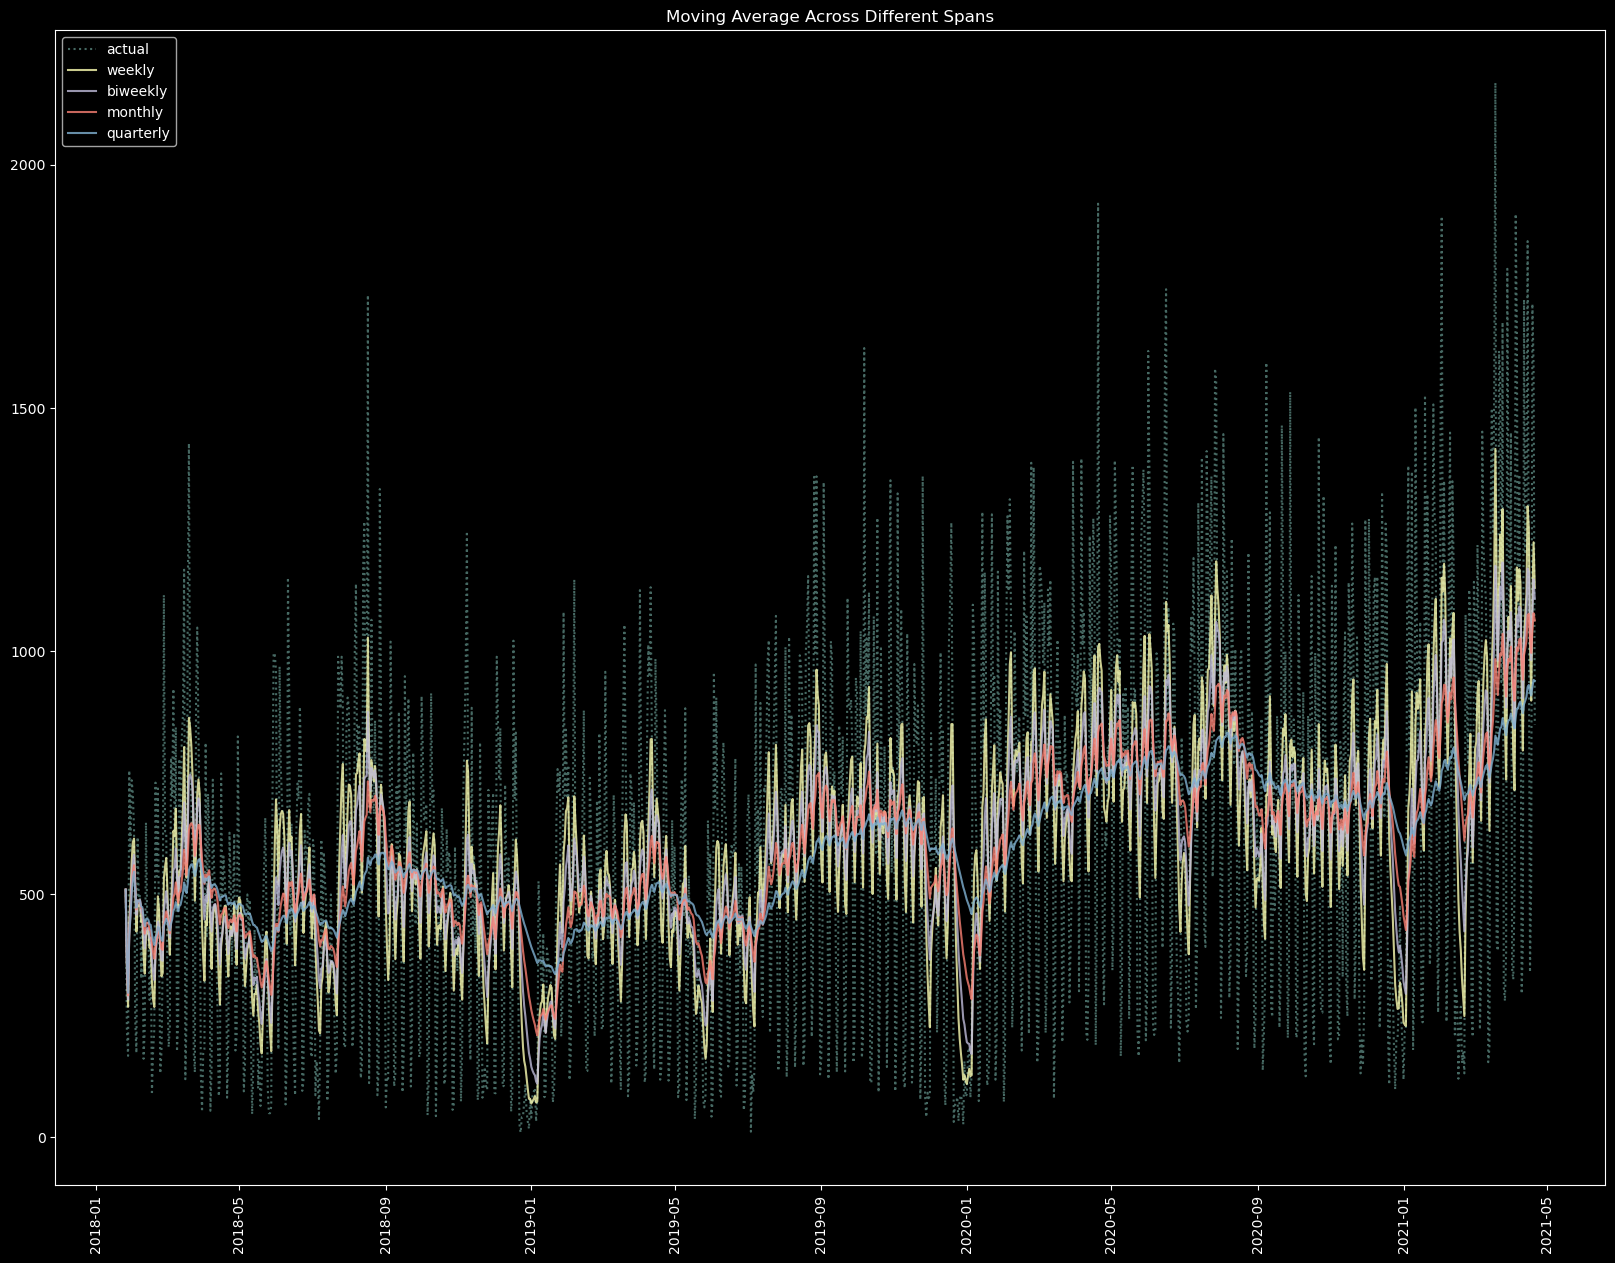

In [294]:
# lets look at a few different windows to see how these
# means compute
plt.figure(figsize=(20,15))
spans = [7,14,30,90]
labels = ['weekly', 'biweekly', 'monthly', 'quarterly']
plt.plot(page_counts, ls=':', alpha=0.5, label='actual')
for i, label in zip(spans, labels):
    plt.plot(page_counts.ewm(span=i).mean(),
             label=label, alpha=0.8)
plt.legend()
plt.title('Moving Average Across Different Spans')
plt.xticks(rotation=90)
plt.show()

<Axes: title={'center': 'Seasonal Plot'}, xlabel='date_time'>

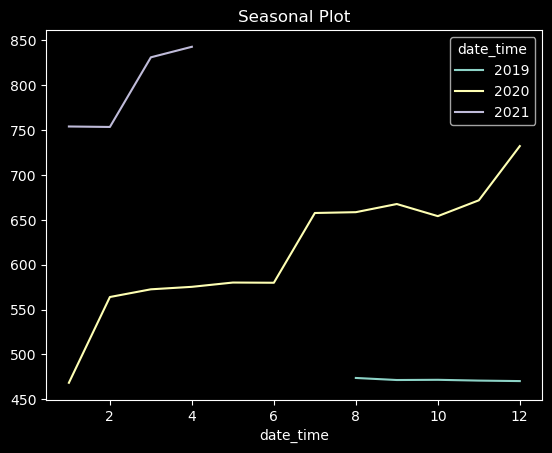

In [295]:
Data_S.user_id.groupby([Data_S.index.year, Data_S.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


<Axes: title={'center': 'Seasonal Plot'}, xlabel='date_time'>

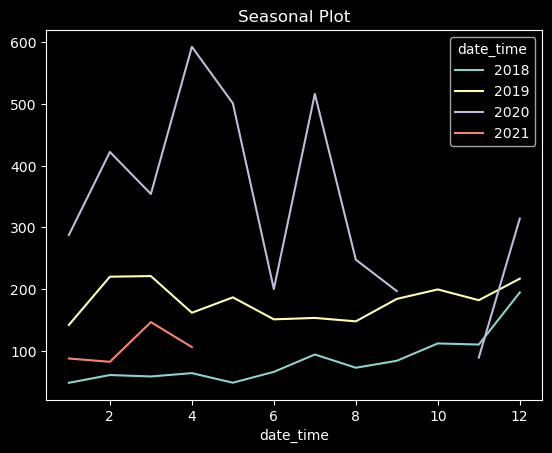

In [296]:
WD_PHP.user_id.groupby([WD_PHP.index.year, WD_PHP.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


<Axes: title={'center': 'Seasonal Plot'}, xlabel='date_time'>

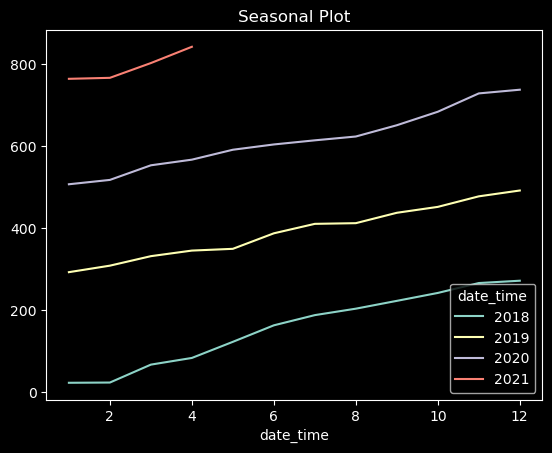

In [297]:
WD_Java.user_id.groupby([WD_Java.index.year, WD_Java.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


<Axes: title={'center': 'Seasonal Plot'}, xlabel='date_time'>

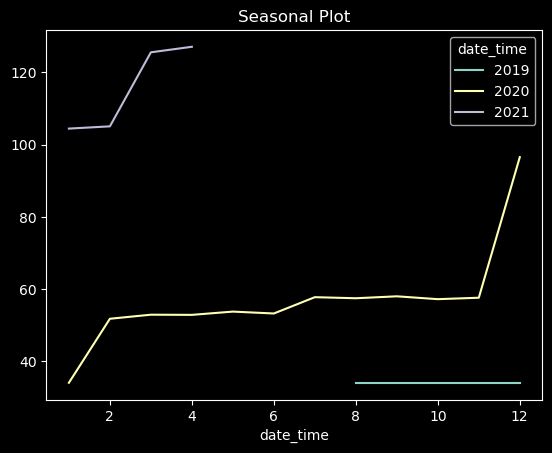

In [298]:
Data_S.cohort_id.groupby([Data_S.index.year, Data_S.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


<Axes: title={'center': 'Seasonal Plot'}, xlabel='date_time'>

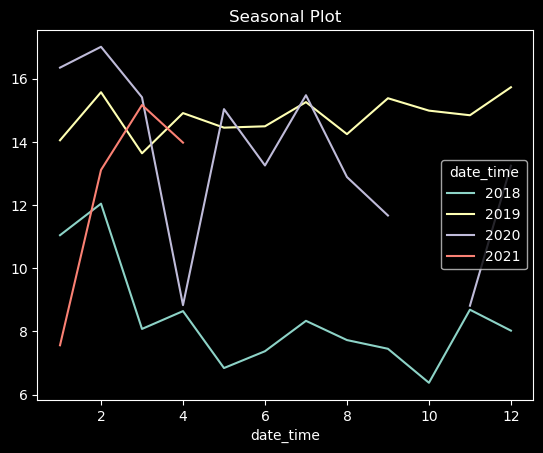

In [299]:
WD_PHP.cohort_id.groupby([WD_PHP.index.year, WD_PHP.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


<Axes: title={'center': 'Seasonal Plot'}, xlabel='date_time'>

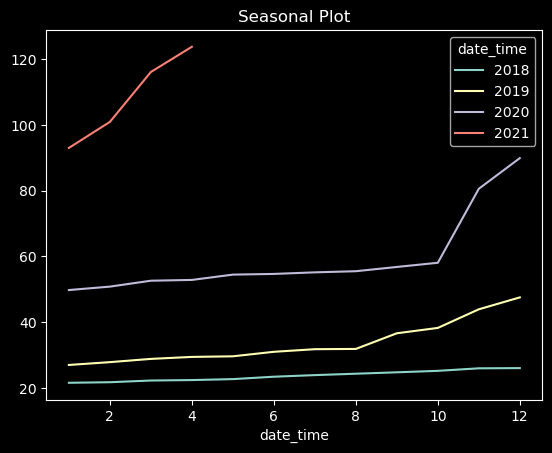

In [300]:
WD_Java.cohort_id.groupby([WD_Java.index.year, WD_Java.index.month]).mean().unstack(0).plot(title='Seasonal Plot')


### Takeaways 
- There are 3 significant drops in paths in 2019 
- Data Sience started in 2019 and since then user_ids and cohort_ids have increased
- I did not find evidence of stutdents access shut off durring 2019 

## 7. Which lessons are least accessed?


In [301]:
cohort_df.head(3)

,name,slack,start_date,end_date,created_at,updated_at,program_id,path,user_id,cohort_id,ip
date_time,,,,,,,,,,,
2018-01-26 09:55:03,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Full-Stack Web Development – PHP,/,1,8.0,97.105.19.61
2018-01-26 09:56:02,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Full-Stack Web Development – PHP,java-ii,1,8.0,97.105.19.61
2018-01-26 09:56:05,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,Full-Stack Web Development – PHP,java-ii/object-oriented-programming,1,8.0,97.105.19.61


In [ ]:
# create function 
def bottom_paths(df: pd.DataFrame, program: str) -> None:
    temp_df = df[df.program_id == program]
    bottom = temp_df.path.value_counts().tail(10)
    print(f'Bottom 5 Trafficed Paths -> {bottom}')

In [ ]:
list_of_cohorts = [
    "Full-Stack Web Development – PHP",
    "Full-Stack Web Development – Java",
    "Data Science",
    "Front-End Web Development",
]
sep_line = "=" * 60

for cohort in list_of_cohorts:
    bottom_paths(cohort_df, cohort)
    print(sep_line)

Bottom 5 Trafficed Paths -> path
php                                                 1
content/jquery/essential-methods/traversing.html    1
2.00.05_Charts_PivotTables_Sparklines               1
home                                                1
content/examples/php/Input.php                      1
student                                             1
student/create                                      1
content/examples/constructors-destructors.html      1
2.00.02_Navigating_Excel                            1
ajax-api-request.html                               1
Name: count, dtype: int64
Bottom 5 Trafficed Paths -> path
6.04.01_Preprocessing               1
6.01.03_Summarize                   1
content/control-structures-ii       1
6.02.01_Prep                        1
6.02.02_MissingVals                 1
npm                                 1
6.03_Explore                        1
content/mysql/clauses/where.html    1
content/mysql/clauses               1
content/jquery/resume-port

### Takeaways
- Data Science - 9-timeseries/6.2-prophet  
- Full-Stack Web Development – PHP - content/jquery/essential-methods/traversing.html
- Full-Stack Web Development – Java - content/control-structures-ii 